In [ ]:
# Este entorno de Python 3 viene con muchas bibliotecas de análisis útiles instaladas
# Está definido por la imagen de Docker kaggle/python:
# Por ejemplo, aquí hay varias bibliotecas útiles para cargar

import numpy as np # Algebra Lineal
import pandas as pd # Procesamiento de datos

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv


In [ ]:
# Importar librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

# Silenciar warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Cargar datos
df= pd.read_csv("/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv")

In [3]:
# Ver las primeras 10 filas
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Mostrar la estructura de los datos
df.shape

(2768, 10)

In [5]:
# Ver las estadísticas descriptivas
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
# Listar las columnas
df.columns.tolist()

['Id',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [7]:
# Ver tipos de datos de df
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
# Verificar valores nulos
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# Eliminar columna ID irrelevante para el análisis
df=df.drop(columns=["Id"])

In [11]:
# Verificar duplicados
df.duplicated().sum()

1990

In [12]:
# Mostrar las observaciones únicas por columna
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     187
BMI                         253
DiabetesPedigreeFunction    523
Age                          52
Outcome                       2
dtype: int64

In [13]:
# Observar variable objetivo
df['Outcome'].unique()

array([1, 0])

In [14]:
# Conteo de valores de la variable objetivo
df['Outcome'].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

In [ ]:
# Importar la librería fm de matplotlib
from matplotlib import font_manager as fm

# Configurar el estilo de los gráficos ggplot
plt.style.use('ggplot')

# Agregar ruta a una fuente

# Ruta a la fuente personalizada
font_path = '/kaggle/input/kelly-slab/KellySlab-Regular.ttf'  # Rura a la fuente personalizada

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

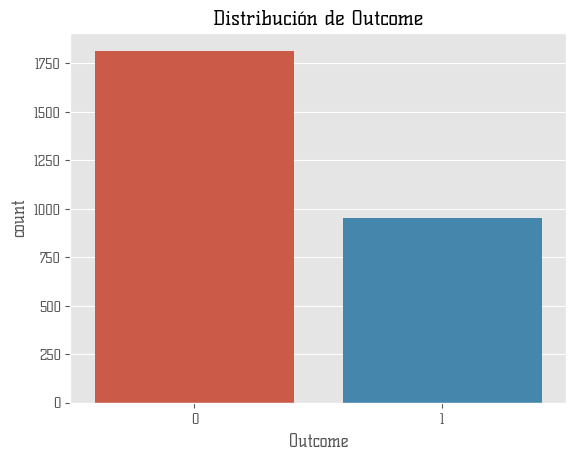

In [28]:
sns.countplot(x=df['Outcome'])
plt.title('Distribución de Outcome', fontweight='bold');

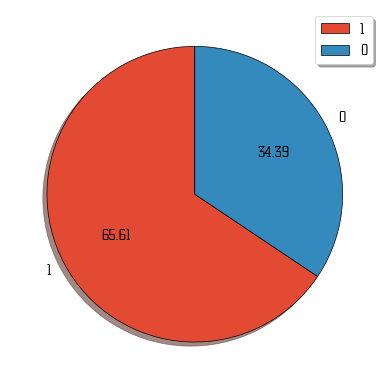

In [ ]:
plt.pie(df.groupby(by=["Outcome"]).size(), labels = df["Outcome"].unique(), autopct = "%0.2f", startangle=90, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Outcome', fontweight='bold')
plt.legend(loc='upper right', fontsize=10, fancybox=True, shadow=True, frameon=True, facecolor='white')
plt.show()

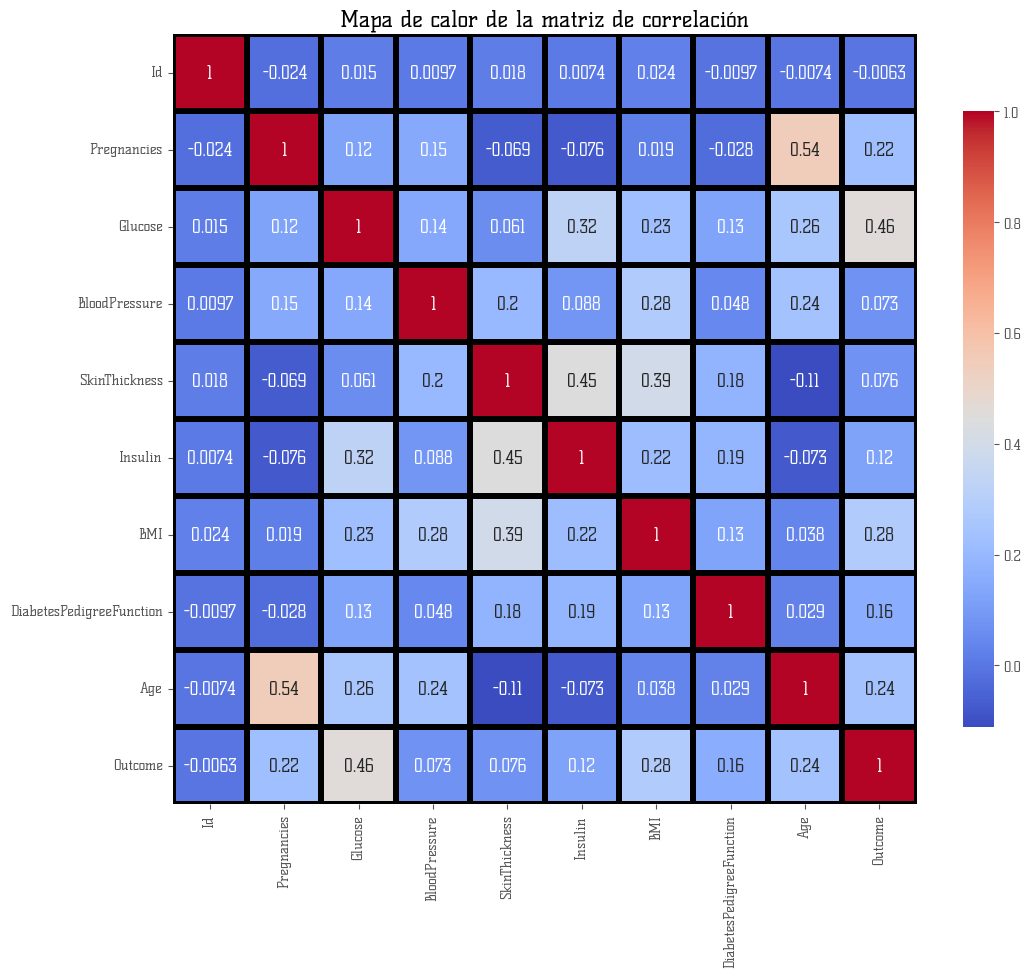

In [31]:
# Calcular la matriz de correlación de las variables númericas
correlation_matrix = df.corr(numeric_only=True)

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 12}, cbar_kws={'shrink': .8}, linewidths=4.2, linecolor='black')
plt.title('Mapa de calor de la matriz de correlación', fontsize=16, fontweight='bold')
plt.show()

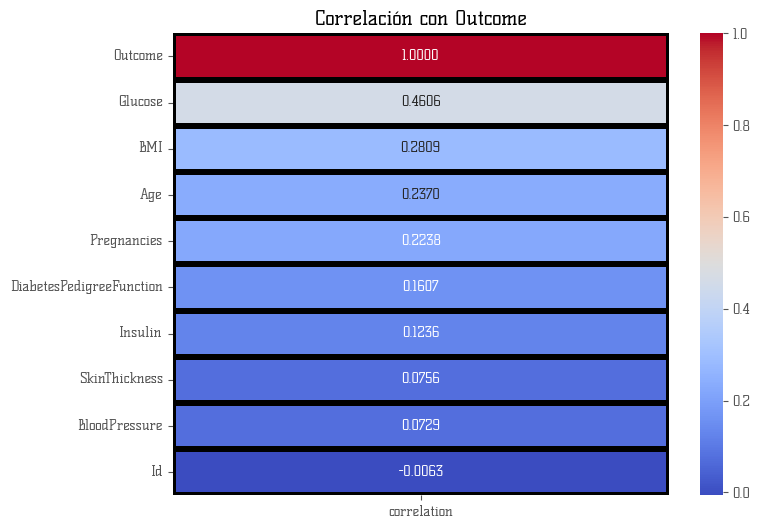

In [ ]:
# Calcular la correlación de las variables con la variable objetivo
corr = df.corrwith(df['Outcome']).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(corr , columns=['correlation']), annot=True, cmap='coolwarm', fmt=".4f", linewidths=4.2, linecolor='black')
plt.title('Correlación con Outcome')
plt.show()

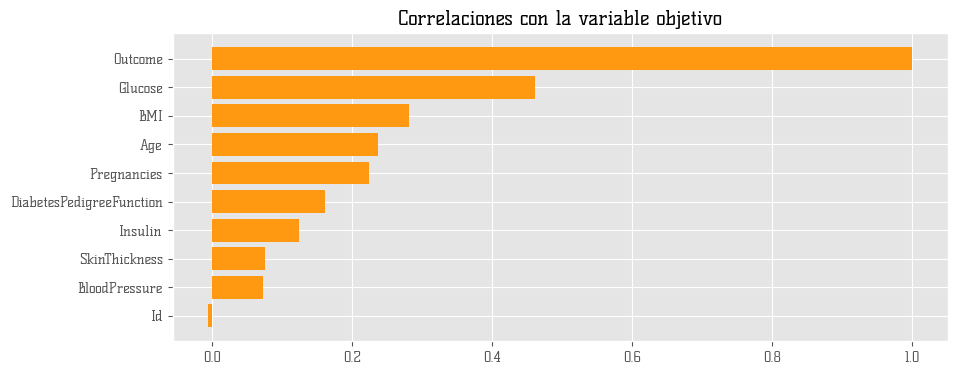

In [ ]:
# Crear un gráfico de barras con las correlaciones de las variables con la variable objetivo
corr = plt.figure(figsize = (10, 4))
outcome_corr = pd.DataFrame(df.corr()['Outcome'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['Outcome'],color="#FF9912")
plt.title('Correlaciones con la variable objetivo', fontweight='bold')
plt.show()

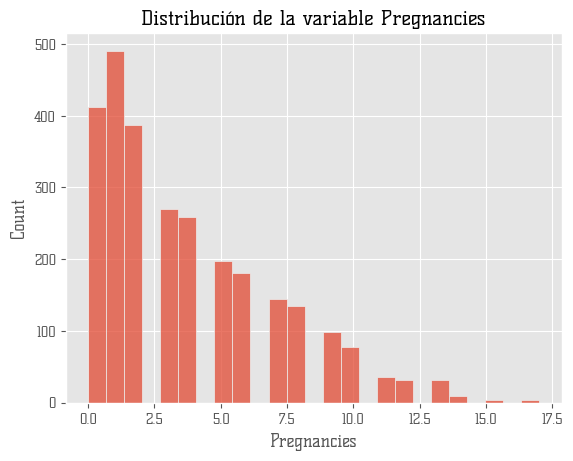

In [ ]:
# Crear un gráfico de barras con las correlaciones de las variables con la variable objetivo
sns.histplot(x=df.Pregnancies,bins=25)
plt.title('Distribución de la variable Pregnancies')
plt.show()

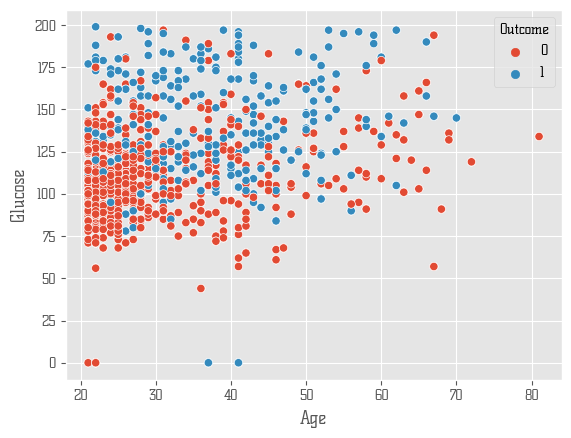

In [ ]:
# Crear un gráfico de barras con las correlaciones de las variables con la variable objetivo
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=df)
plt.show()

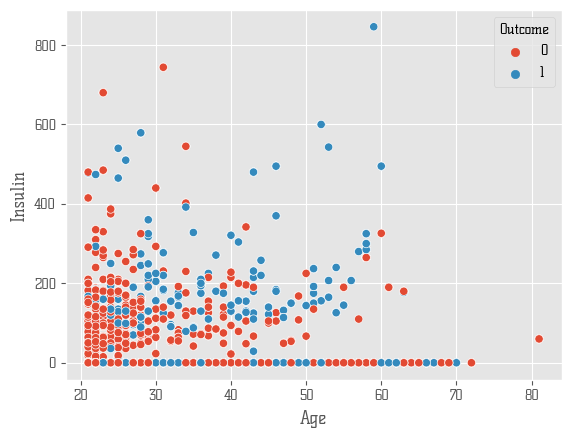

In [ ]:
# Crear un gráfico de barras con las correlaciones de las variables con la variable objetivo
sns.scatterplot(x="Age", y="Insulin", hue="Outcome", data=df)
plt.show()

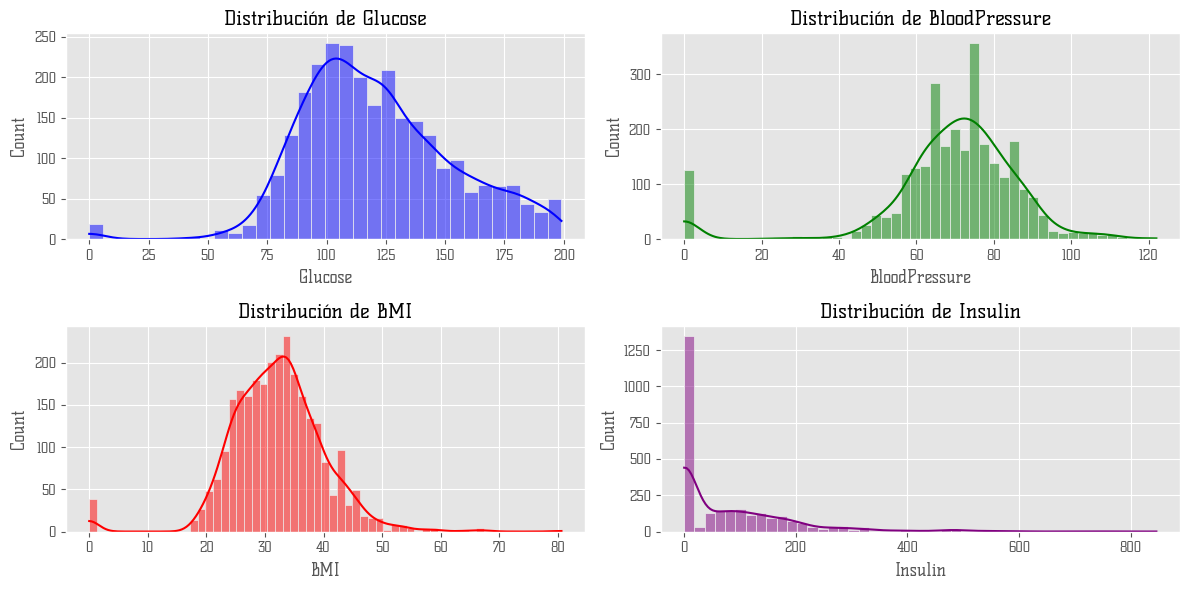

In [ ]:
# Crear un gráfico de barras con las correlaciones de las variables con la variable objetivo
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribución de Glucose')

plt.subplot(2, 2, 2)
sns.histplot(df['BloodPressure'], kde=True, color='green')
plt.title('Distribución de BloodPressure')

plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], kde=True, color='red')
plt.title('Distribución de BMI')

plt.subplot(2, 2, 4)
sns.histplot(df['Insulin'], kde=True, color='purple')
plt.title('Distribución de Insulin')

plt.tight_layout()
plt.show()

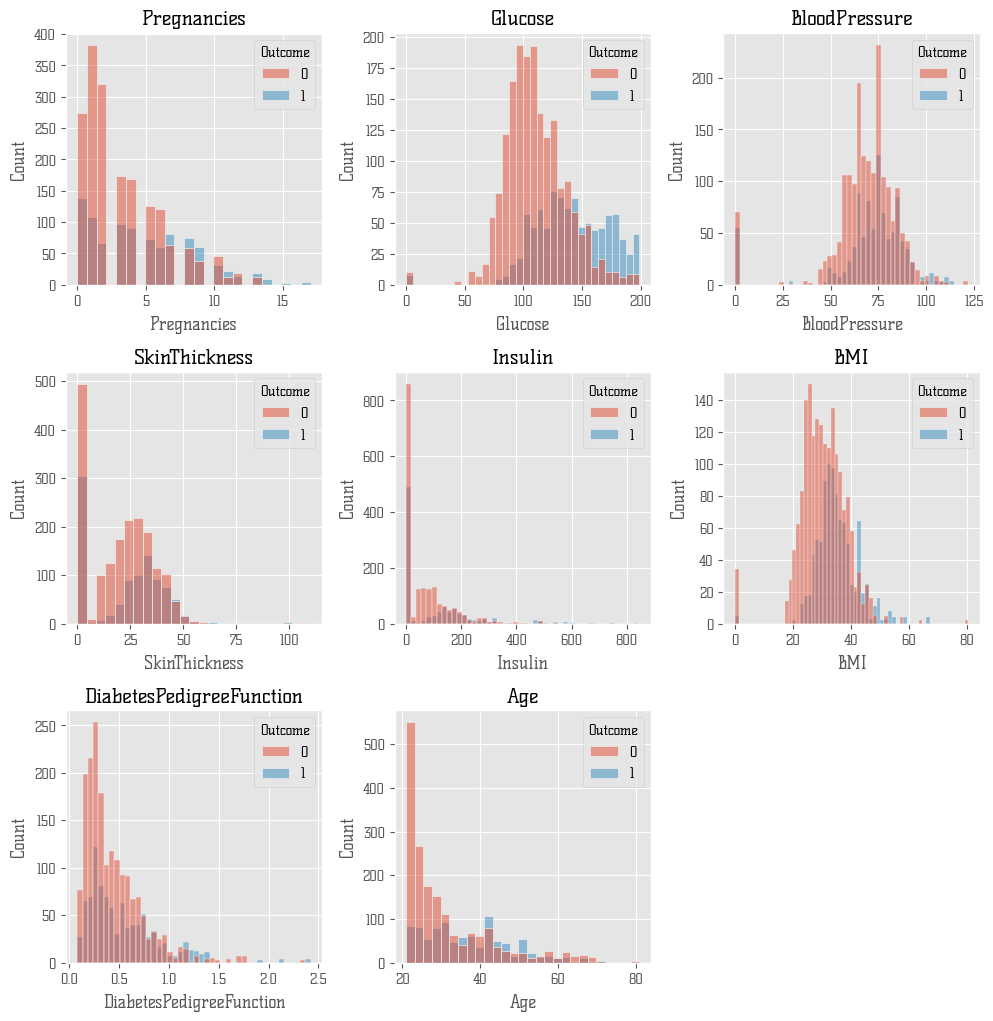

In [ ]:
# Crear un gráfico de barras con las correlaciones de las variables con la variable objetivo
num_list=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
fig = plt.figure(figsize=(10,20))

for i in range(len(num_list)):
    plt.subplot(6,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='Outcome')

plt.tight_layout()

In [ ]:
# Separar las variables independientes y la variable objetivo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=17)

In [ ]:
# Crear un modelo de Random Forest
DT_model = DecisionTreeClassifier(random_state=20)
DT_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=20)

In [ ]:
# Calcular la precisión del modelo
DT_model.score(X_test , y_test)

0.9807460890493381

In [ ]:
# Predecir los valores de la variable objetivo
DT_pred=DT_model.predict(X_test)
DT_acc = accuracy_score(y_test ,DT_pred )

In [ ]:
# Mostrar el reporte de clasificación
print(classification_report(y_test , DT_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       539
           1       0.96      0.99      0.97       292

    accuracy                           0.98       831
   macro avg       0.98      0.98      0.98       831
weighted avg       0.98      0.98      0.98       831



Text(94.75347222222221, 0.5, 'Verdadero')

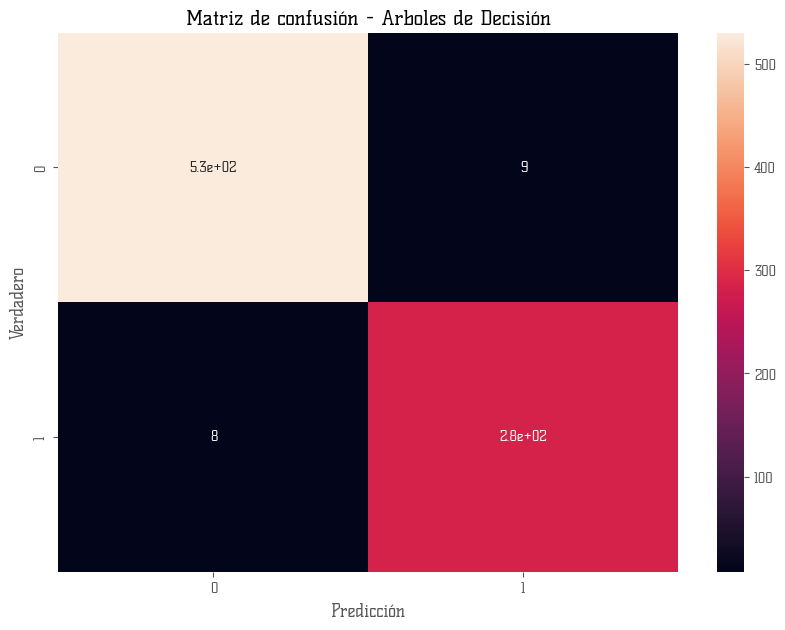

In [ ]:
# Mostrar la matriz de confusión
cm2 = confusion_matrix(y_test,DT_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.title('Matriz de confusión - Arboles de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')

In [ ]:
# Crear un modelo de Random Forest
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
# Calcular la precisión del modelo
RF_model.score(X_train , y_train)

1.0

In [ ]:
# Predecir los valores de la variable objetivo
RF_pred = RF_model.predict(X_test)

In [ ]:
# Mostrar el reporte de clasificación
RF_acc=accuracy_score(y_test , RF_pred)

In [ ]:
# Mostrar el reporte de clasificación
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       539
           1       0.97      1.00      0.98       292

    accuracy                           0.99       831
   macro avg       0.99      0.99      0.99       831
weighted avg       0.99      0.99      0.99       831



Text(94.75347222222221, 0.5, 'Verdadero')

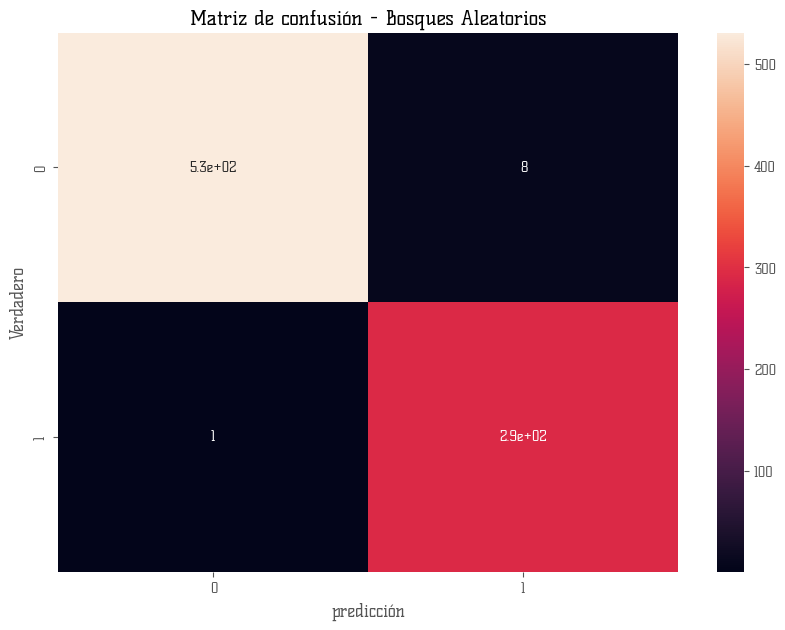

In [ ]:
# Mostrar la matriz de confusión
cm3 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.title('Matriz de confusión - Bosques Aleatorios')
plt.xlabel('predicción')
plt.ylabel('Verdadero')

In [ ]:
# Guardar el modelo
import joblib
joblib.dump(RF_model, 'Alpha_DPP_Model.pkl')

# Guardar el escalador
joblib.dump(X, 'scaler.pkl')